In [20]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Reshape, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0

# Treat each row of the image as a time step
# Shape: (batch_size, time_steps=28, features=28)
x_train_seq = x_train.reshape(-1, 28, 28)
x_test_seq = x_test.reshape(-1, 28, 28)

# Create dummy segmentation masks (thresholded images)
y_train = (x_train > 0.5).astype(np.float32).reshape(-1, 28, 28)
y_test = (x_test > 0.5).astype(np.float32).reshape(-1, 28, 28)


In [23]:
inputs = Input(shape=(28, 28))  # 28 time steps, 28 features
x = LSTM(64, return_sequences=True)(inputs)
x = TimeDistributed(Dense(28, activation='sigmoid'))(x)  # Predict 28 pixels per row
outputs = x  # Already (28, 28)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 28, 64)            23808     
                                                                 
 time_distributed_4 (TimeDis  (None, 28, 28)           1820      
 tributed)                                                       
                                                                 
Total params: 25,628
Trainable params: 25,628
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train_seq, y_train, epochs=3, batch_size=64, validation_split=0.1)


Epoch 1/3
844/844 [==============================] - 27s 19ms/step - loss: 0.1729 - accuracy: 0.0815 - val_loss: 0.0668 - val_accuracy: 0.0860
Epoch 2/3
844/844 [==============================] - 15s 18ms/step - loss: 0.0472 - accuracy: 0.0862 - val_loss: 0.0354 - val_accuracy: 0.0871
Epoch 3/3
844/844 [==============================] - 15s 18ms/step - loss: 0.0297 - accuracy: 0.0858 - val_loss: 0.0256 - val_accuracy: 0.0878


1/1 [==============================] - 1s 795ms/step


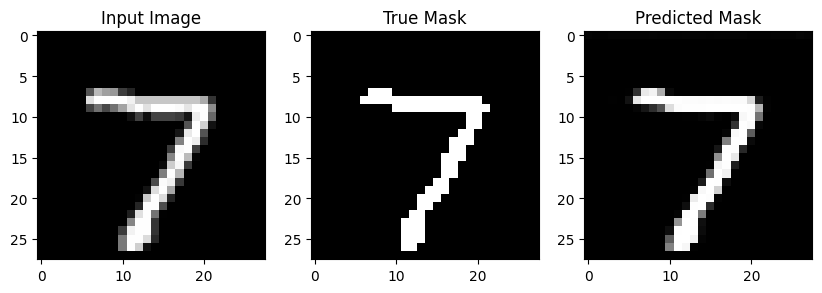

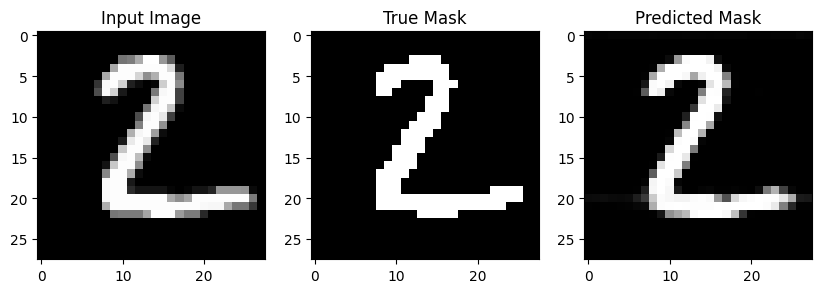

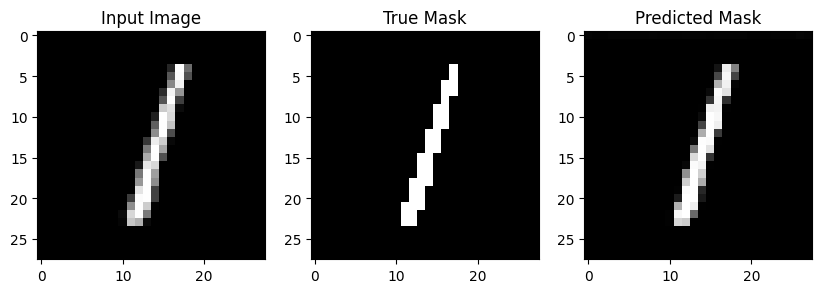

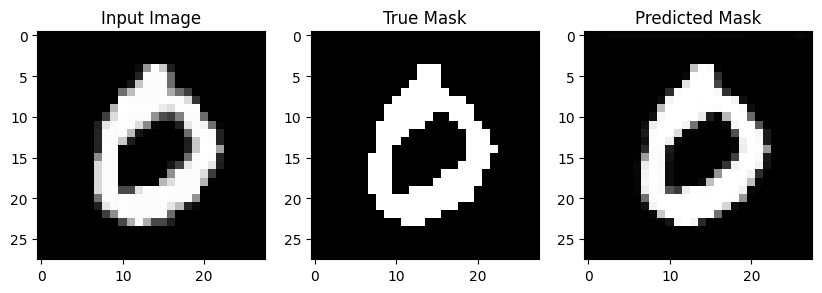

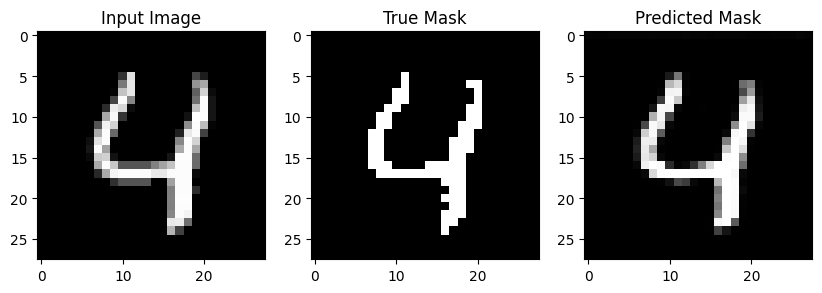

In [25]:
# Predict on test data
preds = model.predict(x_test_seq[:5])

# Plot original and predicted masks
for i in range(5):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(x_test_seq[i], cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i], cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(preds[i], cmap='gray')
    plt.show()
